In [1]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = ct.tf([1, 0], [1])

In [3]:
K_amp = 0.05

In [4]:
G_valve = 3.06*10**-3/(s**2/600**2+2*0.5*s/600+1)

In [5]:
G_motor = 1.25*10**6/(s**2/388**2+2*0.94*s/388+1)

In [6]:
K_gear = 3

In [7]:
K_sensor = 0.175

In [8]:
G = K_amp * G_valve * G_motor * K_gear * K_sensor
G

TransferFunction(array([1.26680473e+18]), array([2.32800000e+05, 3.09493632e+08, 2.20742822e+11, 8.21608934e+13,
       1.26167916e+16]))

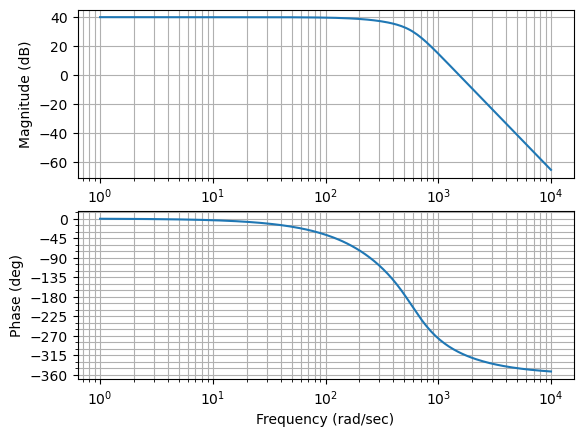

(0.023347926780977846,
 -128.3276109320512,
 515.2366143869341,
 1535.2462985398608)

In [9]:
ct.bode(G, omega = np.logspace(start = 0, stop = 4, num = 200), dB=True, deg=True)
plt.show()
ct.margin(G)

In [10]:
Gc_amp = 1/s

In [11]:
G_hat1 = Gc_amp * G
G_hat1

TransferFunction(array([1.26680473e+18]), array([2.32800000e+05, 3.09493632e+08, 2.20742822e+11, 8.21608934e+13,
       1.26167916e+16, 0.00000000e+00]))

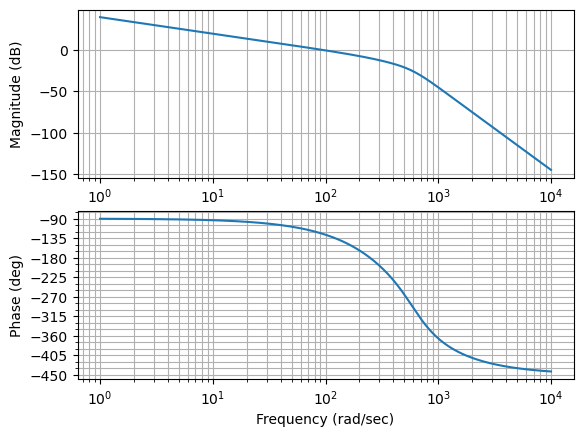

(3.0504142086066155, 53.95384088559814, 247.16832478958648, 96.98527580242953)

In [12]:
ct.bode(G_hat1, omega = np.logspace(start = 0, stop = 4, num = 200), dB=True, deg=True)
plt.show()
ct.margin(G_hat1)

In [25]:
mag, phase, omega = ct.freqresp(G_hat1, 10)
print(20*np.log10(mag), phase, omega)

[20.031995] [-1.63591395] [10.]


In [13]:
a = (1+np.sin(np.pi/180*85)) /(1-np.sin(np.pi/180*85))
a

524.5824762975057

In [14]:
T = 1/a**0.5/500
T

8.732188581702398e-05

In [15]:
Gc2=(a*T*s+1)/(T*s+1)

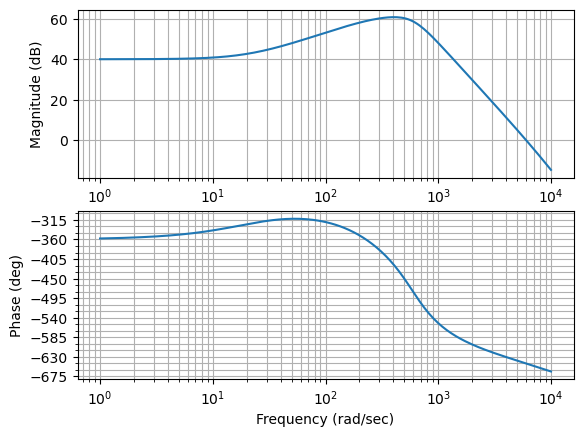

(0.0028678614599651825,
 -105.39803047047957,
 893.817760094377,
 6044.397027158244)

In [16]:
G_hat2 = Gc2 * G
ct.bode(G_hat2, omega = np.logspace(start = 0, stop = 4, num = 200), dB=True, deg=True)
plt.show()
ct.margin(G_hat2)

In [17]:
G_hat2

TransferFunction(array([5.80291969e+16, 1.26680473e+18]), array([2.03285350e+01, 2.59825568e+05, 3.28769312e+08, 2.27917267e+11,
       8.32626155e+13, 1.26167916e+16]))